In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
child = pd.read_csv('children_per_woman_total_fertility.csv')
paro = pd.read_csv('long_term_unemployment_rate_percent.csv')
murder = pd.read_csv('murdered_women_per_100000_people.csv')
pib = pd.read_csv('ny_gdp_mktp_pp_kd.csv')
pop = pd.read_csv('population_total.csv')

In [88]:
child.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


In [89]:
child.columns[1:]

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=301)

In [119]:
child2 = pd.melt(child, id_vars=['country'], value_vars=child.columns[1:], 
                var_name='year', value_name='babies')

In [120]:
child2['concat'] = child2['country'] + '+' + child2['year']

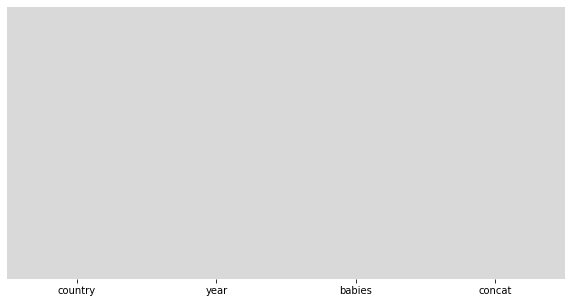

In [161]:
plt.figure(figsize=(10,5))
sns.heatmap(child2.isnull(), yticklabels = False, cmap = 'tab20c_r', cbar = False);

In [122]:
paro.head(5)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0450,0.04910,0.05670,0.05280,0.05300,0.05530,0.05760,0.0609,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02150,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.01560,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0088,0.00925,0.00866,0.00783,0.00811,0.00798,0.00856,NaN,NaN,0.0114
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.07150,0.0711,0.054,NaN


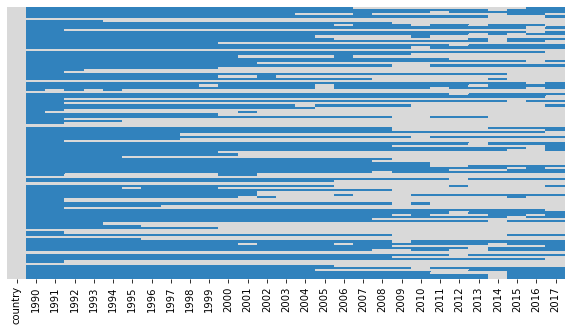

In [159]:
plt.figure(figsize=(10,5))
sns.heatmap(paro.isnull(), yticklabels = False, cmap = 'tab20c_r', cbar = False);

In [123]:
paro2 = pd.melt(paro, id_vars=['country'], value_vars=paro.columns[1:], 
                var_name='year', value_name='paro')
paro2['concat'] = paro2['country'] + '+' + paro2['year']

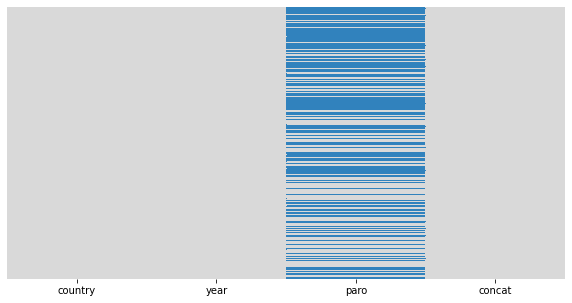

In [160]:
plt.figure(figsize=(10,5))
sns.heatmap(paro2.isnull(), yticklabels = False, cmap = 'tab20c_r', cbar = False);

In [125]:
murder2 = pd.melt(murder, id_vars=['country'], value_vars=murder.columns[1:], 
                var_name='year', value_name='murder')
murder2['concat'] = murder2['country'] + '+' + murder2['year']

In [126]:
pib2 = pd.melt(pib, id_vars=['country'], value_vars=pib.columns[1:], 
                var_name='year', value_name='pib')
pib2['concat'] = pib2['country'] + '+' + pib2['year']

In [127]:
pop2 = pd.melt(pop, id_vars=['country'], value_vars=pop.columns[1:], 
                var_name='year', value_name='pop')
pop2['concat'] = pop2['country'] + '+' + pop2['year']

In [128]:
final = pd.merge(child2, pib2[['pib', 'concat']], on='concat', how='outer')
final = pd.merge(final, paro2[['paro','concat']], on='concat', how='outer')
final = pd.merge(final, pop2[['pop','concat']], on='concat', how='outer')
final = pd.merge(final, murder2[['murder','concat']], on='concat', how='outer')

In [129]:
final.drop(columns=['country','year'], inplace=True)

In [130]:
final[['country','year']] = final['concat'].str.split('+', expand=True)

In [131]:
final = final[['country','year','babies','pib','paro','pop','murder']]

In [134]:
final.sort_values(by='year', ascending=True)

,country,year,babies,pib,paro,pop,murder
0,Afghanistan,1800,7.00,NaN,NaN,3280000,NaN
125,Palestine,1800,6.97,NaN,NaN,166000,NaN
126,Panama,1800,5.36,NaN,NaN,75600,NaN
127,Papua New Guinea,1800,6.23,NaN,NaN,755000,NaN
128,Paraguay,1800,6.49,NaN,NaN,300000,NaN
...,...,...,...,...,...,...,...
55263,Ghana,2100,2.00,NaN,NaN,79000000,NaN
55264,Greece,2100,1.77,NaN,NaN,6580000,NaN
55265,Grenada,2100,1.79,NaN,NaN,86200,NaN
55256,Fiji,2100,1.81,NaN,NaN,1070000,NaN


In [210]:
final['year'] = final['year'].astype('int64')

In [217]:
final2 = pd.get_dummies(final)

In [219]:
play = final2[(final2['year'] >=1950) & (final2['year'] <=2019)]

In [220]:
play.isnull().sum()

year                     0
babies                 770
pib                   8342
paro                 12178
pop                      0
                     ...  
country_Venezuela        0
country_Vietnam          0
country_Yemen            0
country_Zambia           0
country_Zimbabwe         0
Length: 201, dtype: int64

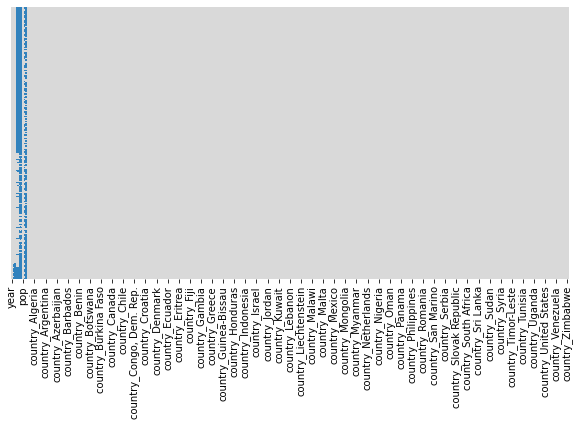

In [221]:
plt.figure(figsize=(10,5))
sns.heatmap(play.isnull(), yticklabels = False, cmap = 'tab20c_r', cbar = False);

In [222]:
play2 = play2.dropna()

MODELO

In [223]:
X = play2.drop(columns='murder', axis=1)

In [224]:
X.isna().sum()

year                 0
babies               0
pib                  0
paro                 0
pop                  0
                    ..
country_Venezuela    0
country_Vietnam      0
country_Yemen        0
country_Zambia       0
country_Zimbabwe     0
Length: 200, dtype: int64

In [225]:
y = play2['murder']

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [227]:
import xgboost

In [228]:
from sklearn.metrics import mean_squared_error

xgb_reg = xgboost.XGBRegressor(random_state=13)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred) # Not shown
print("Validation MSE:", val_error)

Validation MSE: 0.209409660624374


Prediction Murder Australia 2005

In [238]:
final2.columns

Index(['year', 'babies', 'pib', 'paro', 'pop', 'murder', 'country_Afghanistan',
       'country_Albania', 'country_Algeria', 'country_Andorra',
       ...
       'country_United Kingdom', 'country_United States', 'country_Uruguay',
       'country_Uzbekistan', 'country_Vanuatu', 'country_Venezuela',
       'country_Vietnam', 'country_Yemen', 'country_Zambia',
       'country_Zimbabwe'],
      dtype='object', length=201)

In [239]:
to_guess = final2[(final2['country_Australia'] == 1) & (final2['year'] == 2005)]

In [240]:
to_guess

,year,babies,pib,paro,pop,murder,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
37727,2005,1.86,8.680000e+11,0.00792,20200000,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
to_guess_X = to_guess.drop(columns='murder', axis=1)

In [242]:
to_guess_X

,year,babies,pib,paro,pop,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
37727,2005,1.86,8.680000e+11,0.00792,20200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
xgb_reg.predict(to_guess_X)

array([0.8339089], dtype=float32)